In [295]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series,DataFrame
os.chdir('D:\\DS_Notes\\Datasets_new\\amazon_reviews')
dir = 'D:\\DS_Notes\\Datasets_new\\amazon_reviews'
# to list all the files in the current directory
def fr(dir):
    filelist = os.listdir(dir)
    for i in filelist:
        fullfile = os.path.join(dir, i)
        if not os.path.isdir(fullfile):
            print(fullfile)
fr(dir)

D:\DS_Notes\Datasets_new\amazon_reviews\20190928-items.csv
D:\DS_Notes\Datasets_new\amazon_reviews\20190928-reviews.csv
D:\DS_Notes\Datasets_new\amazon_reviews\cloud.png
D:\DS_Notes\Datasets_new\amazon_reviews\flag.jpg


In [296]:
items = pd.read_csv("20190928-items.csv")
reviews = pd.read_csv("20190928-reviews.csv")
print(items.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
asin            792 non-null object
brand           792 non-null object
title           792 non-null object
url             792 non-null object
image           792 non-null object
rating          792 non-null float64
reviewUrl       792 non-null object
totalReviews    792 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82815 entries, 0 to 82814
Data columns (total 8 columns):
asin            82815 non-null object
name            82810 non-null object
rating          82815 non-null int64
date            82815 non-null object
verified        82815 non-null bool
title           82805 non-null object
body            82795 non-null object
helpfulVotes    33134 non-null float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.5+ MB
None


In [297]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [298]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [299]:
data = pd.merge(items, reviews, on="asin",how="inner")

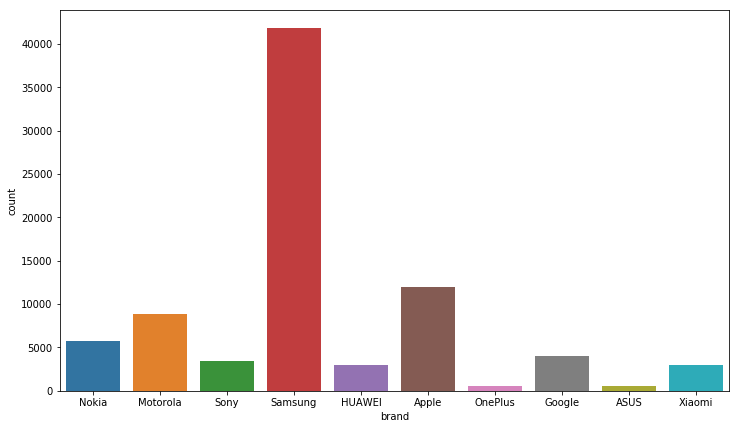

In [300]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'brand', data =data)

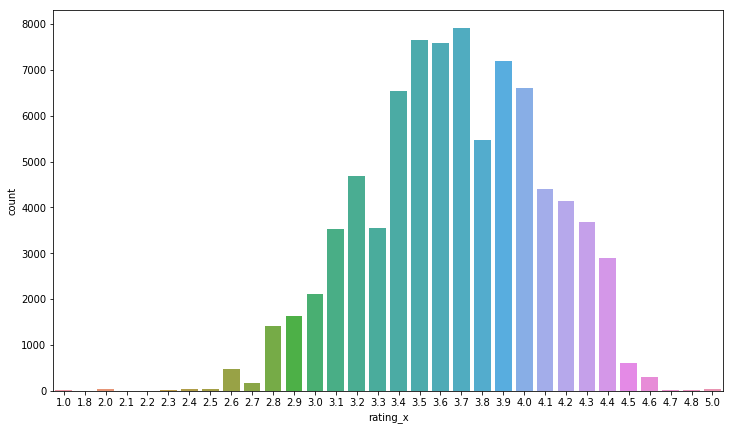

In [301]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'rating_x', data =data)

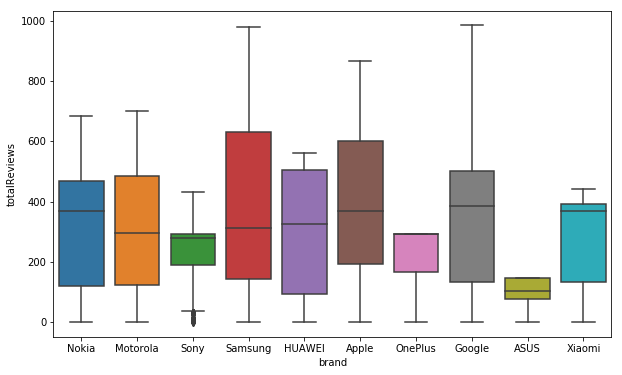

In [302]:
plt.figure(figsize=(10,6))
sns.boxplot(x='brand', y= 'totalReviews', data =data)

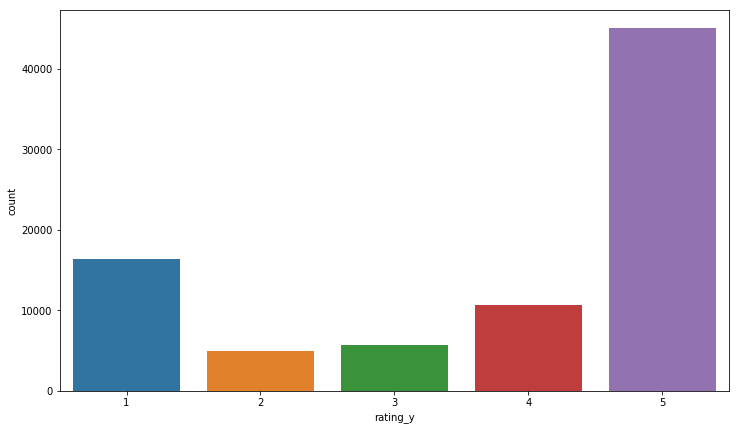

In [303]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'rating_y', data =data)

In [304]:
data.isnull().sum()

asin                0
brand               0
title_x             0
url                 0
image               0
rating_x            0
reviewUrl           0
totalReviews        0
prices          23670
name                5
rating_y            0
date                0
verified            0
title_y            10
body               20
helpfulVotes    49681
dtype: int64

In [305]:
neat_data = data[['asin','brand','title_x','rating_x','totalReviews','rating_y','date','title_y']]

In [306]:
neat_data.isnull().sum()
neat_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82805 entries, 0 to 82814
Data columns (total 8 columns):
asin            82805 non-null object
brand           82805 non-null object
title_x         82805 non-null object
rating_x        82805 non-null float64
totalReviews    82805 non-null int64
rating_y        82805 non-null int64
date            82805 non-null object
title_y         82805 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 5.7+ MB


In [322]:
neat_data.head()

,asin,brand,title_x,rating_x,totalReviews,rating_y,date,title_y
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,3,"October 11, 2005","Def not best, but not worst"
1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,1,"January 7, 2004",Text Messaging Doesn't Work
2,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,5,"December 30, 2003",Love This Phone
3,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,3,"March 18, 2004","Love the Phone, BUT...!"
4,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,4,"August 28, 2005","Great phone service and options, lousy case!"


In [328]:

from bokeh.plotting import figure, output_file, show
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.25)

data1 = pd.DataFrame(neat_data.brand.value_counts())
data1.reset_index(inplace=True)

data1.columns = ['brand','Count']
print(data1.sort_values(by=['Count'],ascending=False).head())

data2 = pd.DataFrame(neat_data.date.value_counts())
data2.reset_index(inplace=True)

data2.columns = ['date','Count']
print(data2.sort_values(by=['Count'],ascending=False).head())

      brand  Count
0   Samsung  41773
1     Apple  12015
2  Motorola   8842
3     Nokia   5760
4    Google   4029
              date  Count
0    July 17, 2019    241
1    July 14, 2019    222
2    July 12, 2019    218
3    July 26, 2019    213
4  August 27, 2019    211


In [308]:
neat_data1 = neat_data.dropna(inplace=False)

In [282]:
#removing unnecessary characters between words separated by space between each word of all columns to make the data efficient
neat_data1['title_y'] = neat_data1['title_y'].str.replace('[^a-zA-Z \n\.]'," ") #removing unnecessary characters
neat_data1.title_y.head()

C:\Users\KANDIRAJU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0                     Def not best  but not worst
1                     Text Messaging Doesn t Work
2                                 Love This Phone
3                         Love the Phone  BUT... 
4    Great phone service and options  lousy case 
Name: title_y, dtype: object

In [283]:
# converting all the characeters to lower case
neat_data1['title_y'] = neat_data1['title_y'].str.lower() 
neat_data1['title_y'].head()

C:\Users\KANDIRAJU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0                     def not best  but not worst
1                     text messaging doesn t work
2                                 love this phone
3                         love the phone  but... 
4    great phone service and options  lousy case 
Name: title_y, dtype: object

In [285]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
from subprocess import check_output
#only_text['title_y'].astype(str)
stop_words = set(stopwords.words("english"))

In [286]:
text = only_text1['title_y']

In [287]:
wordcloud = WordCloud(background_color='white',stopwords=stop_words, max_words=100, max_font_size=50,  random_state=42).generate(str(only_text1['title_y']))

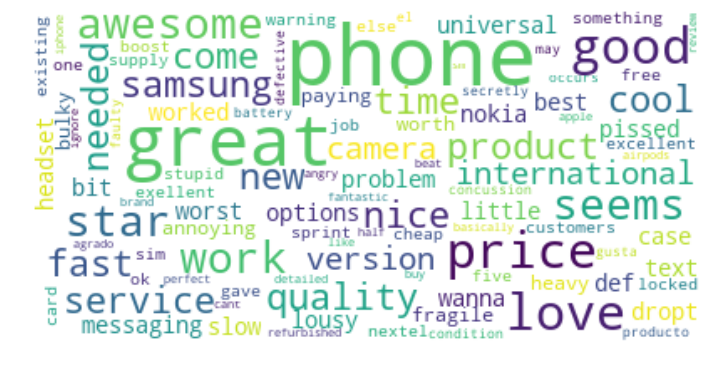

In [288]:
# Display the generated image:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

In [289]:
from PIL import Image 
flag = np.array(Image.open("cloud.png"))

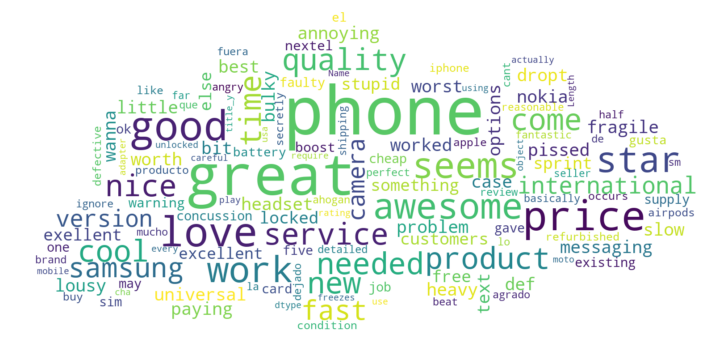

In [290]:
wordcloud = WordCloud(background_color='white',stopwords=stop_words, max_words=150, max_font_size=150,
                      random_state=42,mask=flag).generate(str(only_text1['title_y']))

# Display the generated image:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')